# Proyecto ML emociones de perros

Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import os

from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping



# Pre-proccessing

Carga de dataset

Creación de X e y para entrenamiento de modelos

In [4]:
base = "C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc"

lista_rutas = []
target = []

rutas = [
    "data/raw/data_perros_emociones/Dog_Emotion/angry",
    "data/raw/data_perros_emociones/Dog_Emotion/happy",
    "data/raw/data_perros_emociones/Dog_Emotion/relaxed",
    "data/raw/data_perros_emociones/Dog_Emotion/sad"
]

for ruta in rutas:
    ruta_total = os.path.join(base, ruta)

    for foto in os.listdir(ruta_total):
        nuevo_nombre = foto.replace("JPEG", "jpg")

        ruta_foto = os.path.join(ruta_total, foto)
        lista_rutas.append(ruta_foto)

        clase_actual = os.path.basename(ruta_total)
        target.append(clase_actual)

print(lista_rutas)
print(len(lista_rutas))
print("*" * 50)
print(target)
print(len(target))

['C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0aNyXBrmNA7XdefwHvgO2n1rnpqQAp885.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0AvKtuzA7LfxnKaO0bey9mQMLnxXad73.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0C5yo7GxMy8lztxNZvSdfEx2gSPRTR701.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/raw/data_perros_emociones/Dog_Emotion/angry\\0C9jEgFQHsh36W5U2u5CA98lB7C5eX806.jpg', 'C:\\Users

In [5]:
df = pd.DataFrame({"path_fotos": lista_rutas, "target": target})
df

path_fotos target
0     C:\Users\Administrador\Desktop\repositorios_ag...  angry
1     C:\Users\Administrador\Desktop\repositorios_ag...  angry
2     C:\Users\Administrador\Desktop\repositorios_ag...  angry
3     C:\Users\Administrador\Desktop\repositorios_ag...  angry
4     C:\Users\Administrador\Desktop\repositorios_ag...  angry
...                                                 ...    ...
3995  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3996  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3997  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3998  C:\Users\Administrador\Desktop\repositorios_ag...    sad
3999  C:\Users\Administrador\Desktop\repositorios_ag...    sad

[4000 rows x 2 columns]

In [4]:
df["target"].value_counts()

target
angry      1000
happy      1000
relaxed    1000
sad        1000
Name: count, dtype: int64

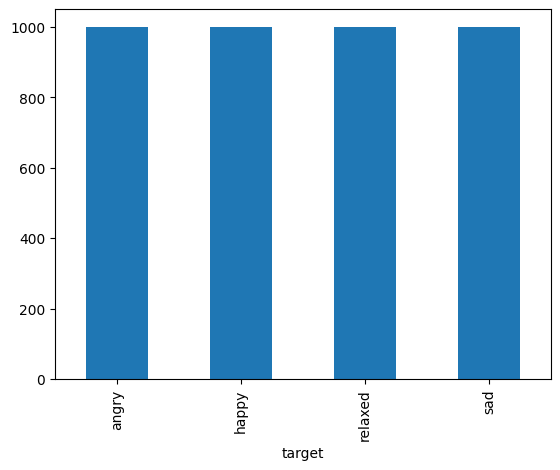

In [5]:
df['target'].value_counts().plot.bar();

In [8]:
img_height, img_width = 64, 64
lista_fotos_3d = []
lista_fotos_flat = []

for foto in df["path_fotos"]:
    if os.path.exists(foto):
        img = Image.open(foto).convert("RGB")
        img_resized = img.resize((img_height, img_width))
        img_array = np.array(img_resized)
        img_flat = img_array.flatten()
        lista_fotos_3d.append(img_array)
        lista_fotos_flat.append(img_flat)
    else:
        print(f"Imagen no encontrada: {foto}")

X_3d = np.array(lista_fotos_3d)
X_flat = np.array(lista_fotos_flat)

print("Shape X_3d:", X_3d.shape)
print("Shape X_flat:", X_flat.shape)

print(lista_fotos_3d)
print(len(lista_fotos_3d))
print("_" * 50)
print(lista_fotos_flat)
print(len(lista_fotos_flat))

Shape X_3d: (4000, 64, 64, 3)
Shape X_flat: (4000, 12288)
[array([[[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], shape=(64, 64, 3), dtype=uint8), array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1

# Modelos Supervisados

In [18]:
# Primera matriz fila 50
lista_fotos_3d[0][50][10]

array([126,  95,  75], dtype=uint8)

**lista_fotos_flat:** imágenes sin dimensionalidad espacial donde cada píxel se trata como un feature independiente.

**lista_fotos_1d:** imágenes en escala de grises con su estructura espacial original (alto × ancho × canales), listas para ser procesadas como tensores 2D/3D (listas de matrices).

In [11]:
X = np.array(lista_fotos_flat)
X.shape

(4000, 12288)

In [12]:
y = df["target"]
y

0       angry
1       angry
2       angry
3       angry
4       angry
        ...  
3995      sad
3996      sad
3997      sad
3998      sad
3999      sad
Name: target, Length: 4000, dtype: object

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3600, 12288)
(3600,)
(400, 12288)
(400,)


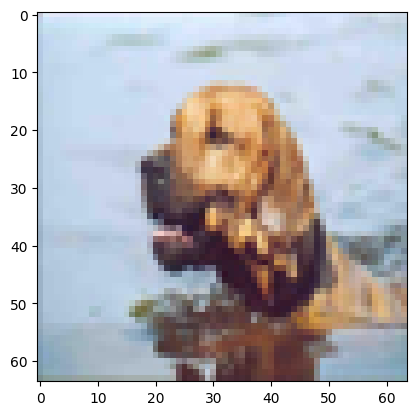

In [16]:
plt.imshow(X_train[0].reshape(64, 64, 3))
plt.show()

## RandomForest

In [19]:
rf = RandomForestClassifier(
    random_state=11,
    class_weight='balanced',
    n_jobs=-1
)

parametros = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "max_features": ["sqrt"],
    "max_leaf_nodes": [None]
}

grid = GridSearchCV(
    rf,
    param_grid=parametros,
    cv=3,                
    scoring="accuracy", 
    verbose=3
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.403 total time=   3.0s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.391 total time=   3.1s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.393 total time=   3.8s
[CV 1/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, n_estimators=200;, score=0.407 total time=   8.2s
[CV 2/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, n_estimators=200;, score=0.394 total time=   8.5s
[CV 3/3] END max_depth=10, max_features=sqrt, max_leaf_nodes=None, n_estimators=200;, score=0.400 total time=   8.0s
[CV 1/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.412 total time=   5.6s
[CV 2/3] END max_depth=20, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.372 total time=   5.7s
[CV 

In [25]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features='log2',
    class_weight='balanced', # correción del desbalanceo de clases
    max_leaf_nodes=None,
    random_state=11,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

y_pred_proba = rf_model.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Accuracy: ", round(acc, 4))
print("AUC: ", round(auc, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred))



Accuracy:  0.3925
AUC:  0.6849
Confusion matrix:  [[34 26 27 15]
 [ 2 61 35  3]
 [ 4 50 36  6]
 [20 41 14 26]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

       angry       0.57      0.33      0.42       102
       happy       0.34      0.60      0.44       101
     relaxed       0.32      0.38      0.35        96
         sad       0.52      0.26      0.34       101

    accuracy                           0.39       400
   macro avg       0.44      0.39      0.39       400
weighted avg       0.44      0.39      0.39       400



<Axes: >

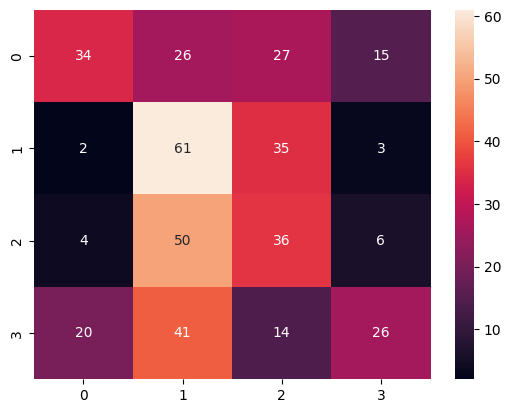

In [26]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True)

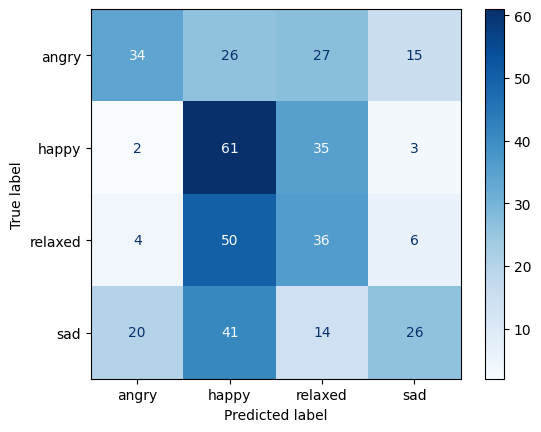

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["angry", "happy", "relaxed", "sad"])
disp.plot(cmap='Blues')

## KNN

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

y_pred_proba_knn = knn_model.predict_proba(X_test)

auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

print("Accuracy: ", round(acc_knn, 4))
print("AUC: ", round(auc_knn, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred_knn))


Accuracy:  0.3425
AUC:  0.6033
Confusion matrix:  [[56 24  9 13]
 [40 26 24 11]
 [31 25 31  9]
 [39 22 16 24]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

       angry       0.34      0.55      0.42       102
       happy       0.27      0.26      0.26       101
     relaxed       0.39      0.32      0.35        96
         sad       0.42      0.24      0.30       101

    accuracy                           0.34       400
   macro avg       0.35      0.34      0.33       400
weighted avg       0.35      0.34      0.33       400



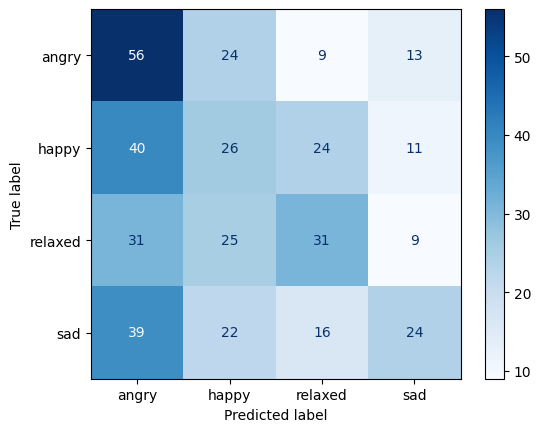

In [30]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["angry", "happy", "relaxed", "sad"])
disp.plot(cmap='Blues')

In [32]:
parametros = {
    "n_neighbors": [3, 5, 7, 9, 11],       
    "weights": ["uniform", "distance"],    
    "metric": ["euclidean", "manhattan"],  
    "p": [1, 2]                             
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=parametros,
    cv=3,                 
    scoring="accuracy",
    verbose=3,
    n_jobs=-1            
)

grid_knn.fit(X_train, y_train)

print("Mejores parámetros:", grid_knn.best_params_)
print("Mejor accuracy:", grid_knn.best_score_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


KeyboardInterrupt: 

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean", p=1, weights="distance")

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

y_pred_proba_knn = knn_model.predict_proba(X_test)

auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

print("Accuracy: ", round(acc_knn, 4))
print("AUC: ", round(auc_knn, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred_knn))


Accuracy:  0.37
AUC:  0.644
Confusion matrix:  [[37 18 24 23]
 [12 37 38 14]
 [ 7 27 45 17]
 [21 28 23 29]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

       angry       0.48      0.36      0.41       102
       happy       0.34      0.37      0.35       101
     relaxed       0.35      0.47      0.40        96
         sad       0.35      0.29      0.32       101

    accuracy                           0.37       400
   macro avg       0.38      0.37      0.37       400
weighted avg       0.38      0.37      0.37       400



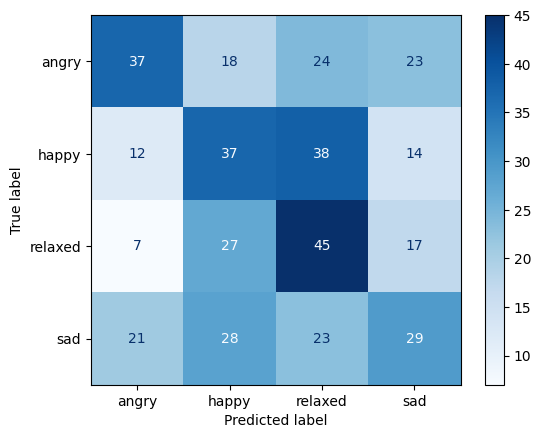

In [35]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["angry", "happy", "relaxed", "sad"])
disp.plot(cmap='Blues')

# Modelos No Supervisados

In [36]:
X_rn = np.array(lista_fotos_3d)
X_rn.shape

(4000, 64, 64, 3)

In [37]:
# Normalización de y con One Hot Encoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(df[["target"]]).toarray()

y_encoded


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(4000, 4))

In [38]:
y_rn = y_encoded
y_rn

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], shape=(4000, 4))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_rn, y_rn, test_size=0.1, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3600, 64, 64, 3)
(3600, 4)
(400, 64, 64, 3)
(400, 4)


C:\Users\Administrador\AppData\Local\Temp\ipykernel_17592\2801916547.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


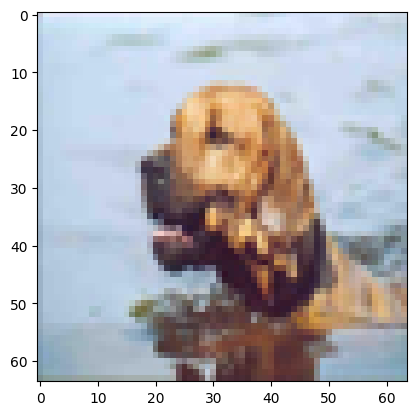

In [40]:
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

### Normalización de los datos

In [41]:
np.max(X_train)

np.uint8(255)

In [42]:
np.min(X_train)

np.uint8(0)

In [43]:
# Normalización de X
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [44]:
np.max(X_train)

np.float32(1.0)

In [45]:
np.min(X_train)

np.float32(0.0)

In [46]:
np.mean(X_train)

np.float32(0.433651)

In [47]:
# Normalización de y
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [48]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,       
    stratify=y_train,   
    random_state=42
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_val:", X_val.shape)
print("Tamaño X_test:", X_test.shape)

Tamaño X_train: (2880, 64, 64, 3)
Tamaño X_val: (720, 64, 64, 3)
Tamaño X_test: (400, 64, 64, 3)


In [49]:
256*256

65536

In [50]:
X_train.shape

(2880, 64, 64, 3)

## Redes neuronales

In [63]:
model = keras.models.Sequential()

# Capa entrada se aplana de una dimension a una, va a tener 784 neuronas (una para cada pixel) 28x28
# cada pixel es como el feature de un dataset
model.add(keras.layers.Flatten(input_shape=(64, 64, 3)))

# Hidden layer
model.add(keras.layers.Dense(units = 32,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 16,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 4,
                            activation='softmax'))

In [64]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = [keras.metrics.CategoricalAccuracy()]
)


In [65]:
# Summary: devuelve la red neuronal que se ha creado
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │       393,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 393,844 (1.50 MB)

 Trainable params: 393,844 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Entrenamiento
history = model.fit(
    X_train,
    y_train,
    # cuántas muestras se usan para calcular un paso de entrenamiento antes de actualizar los pesos.
    batch_size = 16,
    epochs =30,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - categorical_accuracy: 0.2479 - loss: 1.4840 - val_categorical_accuracy: 0.2514 - val_loss: 1.3863
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2510 - loss: 1.3865 - val_categorical_accuracy: 0.2514 - val_loss: 1.3863
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2403 - loss: 1.3865 - val_categorical_accuracy: 0.2514 - val_loss: 1.3863
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2510 - loss: 1.3865 - val_categorical_accuracy: 0.2500 - val_loss: 1.3863
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2372 - loss: 1.3865 - val_categorical_accuracy: 0.2514 - val_loss: 1.3863
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2347 - loss: 1.3865 - val_categorical_accuracy: 0.2500 - val_loss: 1.3863
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - categorical_accuracy: 0.2382 - los

In [71]:
df_history = pd.DataFrame(history.history)
df_history

categorical_accuracy      loss  val_categorical_accuracy  val_loss
0               0.247917  1.483982                  0.251389  1.386331
1               0.251042  1.386543                  0.251389  1.386301
2               0.240278  1.386493                  0.251389  1.386289
3               0.251042  1.386505                  0.250000  1.386291
4               0.237153  1.386465                  0.251389  1.386290
5               0.234722  1.386488                  0.250000  1.386292
6               0.238194  1.386446                  0.251389  1.386288
7               0.242708  1.386529                  0.251389  1.386295
8               0.241667  1.386514                  0.251389  1.386290
9               0.237500  1.386453                  0.251389  1.386288
10              0.232986  1.386455                  0.250000  1.386293
11              0.240625  1.386462                  0.251389  1.386290
12              0.242708  1.386487                  0.251389  1.386287
13              0.246181  1.386485                  0.251389  1.386288
14              0.246528  1.386451                  0.251389  1.386287
15              0.238542  1.386456                  0.251389  1.386289
16              0.251042  1.386473                  0.251389  1.386290
17              0.244097  1.386486                  0.251389  1.386291
18              0.244792  1.386460                  0.251389  1.386290
19              0.240278  1.386445                  0.251389  1.386295
20              0.233333  1.386442                  0.251389  1.386291
21              0.247569  1.386435                  0.251389  1.386292
22              0.245486  1.386491                  0.251389  1.386288
23              0.237500  1.386481                  0.251389  1.386287
24              0.237847  1.386475                  0.251389  1.386288
25              0.242014  1.386467                  0.251389  1.386287
26              0.246181  1.386445                  0.251389  1.386291
27              0.251042  1.386433                  0.251389  1.386288
28              0.235069  1.386512                  0.251389  1.386293
29              0.240278  1.386536                  0.251389  1.386298

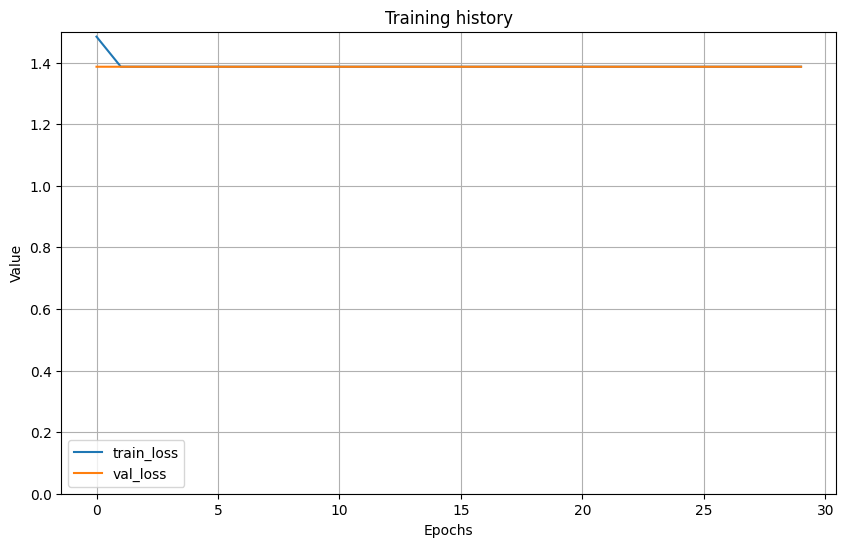

In [68]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
# plt.plot(df_history['categorical_accuracy'], label='train_accuracy')
# plt.plot(df_history['val_categorical_accuracy'], label='val_accuracy')
plt.plot(df_history['loss'], label='train_loss')
plt.plot(df_history['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

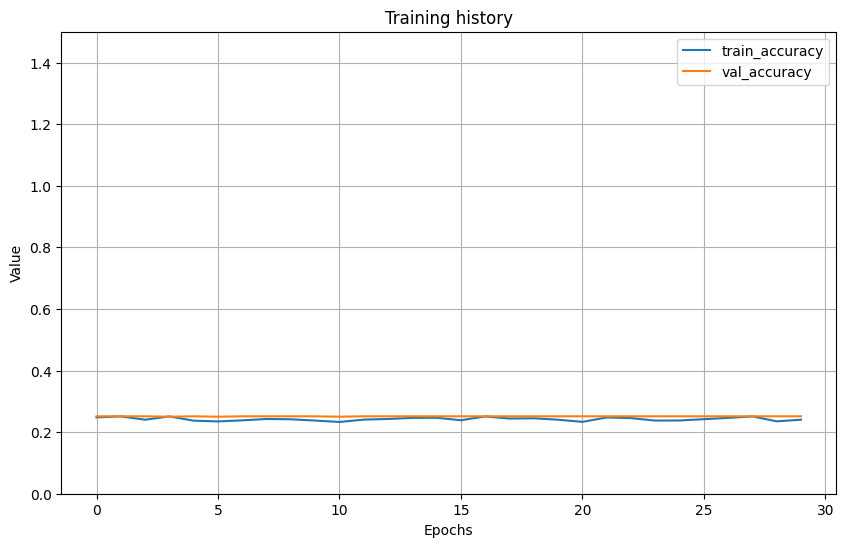

In [69]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
plt.plot(df_history['categorical_accuracy'], label='train_accuracy')
plt.plot(df_history['val_categorical_accuracy'], label='val_accuracy')
# plt.plot(df_history['loss'], label='train_loss')
# plt.plot(df_history['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

In [70]:
results = model.evaluate(X_test, y_test)
results

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - categorical_accuracy: 0.2400 - loss: 1.3864  


[1.3863739967346191, 0.23999999463558197]

# CONCLUSIONES

- El modelo DE red neuronal aprende y mejora el accuracy.

- La validación es inestable, variando entre 37% y 83% lo cual se debe a:

    - Tienes muy pocas imágenes.

    - El modelo no generaliza bien todavía.

- No hay un overfitting extremo, pero sí irregularidad en la validación por el dataset pequeño.

## Redes convolucionales + Redes neuronales 

In [72]:
X_train, y_train = shuffle(X_train, y_train, random_state=11)

In [73]:
X_train

array([[[[0.21960784, 0.1764706 , 0.23529412],
         [0.7647059 , 0.69411767, 0.7490196 ],
         [0.23529412, 0.16078432, 0.23921569],
         ...,
         [0.2       , 0.21960784, 0.3529412 ],
         [0.2       , 0.20784314, 0.32941177],
         [0.20784314, 0.2       , 0.32156864]],

        [[0.48235294, 0.4392157 , 0.49411765],
         [0.93333334, 0.8745098 , 0.92156863],
         [0.22745098, 0.16078432, 0.23529412],
         ...,
         [0.20784314, 0.22352941, 0.36862746],
         [0.20784314, 0.21176471, 0.34901962],
         [0.23921569, 0.21960784, 0.35686275]],

        [[0.79607844, 0.7490196 , 0.8039216 ],
         [0.98039216, 0.92941177, 0.972549  ],
         [0.27058825, 0.21568628, 0.28235295],
         ...,
         [0.21568628, 0.22352941, 0.37254903],
         [0.21176471, 0.20392157, 0.34901962],
         [0.24705882, 0.22352941, 0.36862746]],

        ...,

        [[0.17254902, 0.27450982, 0.6       ],
         [0.16862746, 0.2627451 , 0.5921569 ]

In [77]:
layers = [

    # Capas convolucionales
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    # Capas neuronales
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
]

model_conv_neu = keras.Sequential(layers)

model_conv_neu.compile(optimizer = 'adam',
             loss='categorical_crossentropy',
             metrics=[keras.metrics.CategoricalAccuracy()])

In [78]:
model_conv_neu.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,660 (736.95 KB)

 Trainable params: 188,660 (736.95 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
# Entrenamiento
history_conv_neu = model_conv_neu.fit(
    X_train,
    y_train,
    # cuántas muestras se usan para calcular un paso de entrenamiento antes de actualizar los pesos.
    batch_size = 16,
    epochs =30,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - categorical_accuracy: 0.2378 - loss: 1.3880 - val_categorical_accuracy: 0.2486 - val_loss: 1.3863
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - categorical_accuracy: 0.2510 - loss: 1.3864 - val_categorical_accuracy: 0.2500 - val_loss: 1.3864
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - categorical_accuracy: 0.2448 - loss: 1.3863 - val_categorical_accuracy: 0.2583 - val_loss: 1.3810
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - categorical_accuracy: 0.3024 - loss: 1.3238 - val_categorical_accuracy: 0.3042 - val_loss: 1.3060
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - categorical_accuracy: 0.3438 - loss: 1.2814 - val_categorical_accuracy: 0.3139 - val_loss: 1.2922
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - categorical_accuracy: 0.3660 - loss: 1.2586 - val_categorical_accuracy: 0.3167 - val_loss: 1.2856
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - categorical_accuracy

In [80]:
df_history_conv_neu = pd.DataFrame(history_conv_neu.history)
df_history_conv_neu

categorical_accuracy      loss  val_categorical_accuracy  val_loss
0               0.237847  1.388043                  0.248611  1.386264
1               0.251042  1.386395                  0.250000  1.386428
2               0.244792  1.386255                  0.258333  1.381007
3               0.302431  1.323800                  0.304167  1.305987
4               0.343750  1.281396                  0.313889  1.292175
5               0.365972  1.258620                  0.316667  1.285583
6               0.378819  1.237189                  0.333333  1.286630
7               0.385069  1.216666                  0.325000  1.287973
8               0.430208  1.182167                  0.347222  1.290091
9               0.467014  1.135916                  0.358333  1.305727
10              0.495486  1.082696                  0.368056  1.331147
11              0.550000  1.013703                  0.372222  1.337602
12              0.615625  0.909314                  0.373611  1.491776
13              0.679514  0.786434                  0.366667  1.661758
14              0.713889  0.679489                  0.401389  1.704199
15              0.781944  0.550878                  0.388889  2.070029
16              0.822917  0.462829                  0.377778  2.273310
17              0.856597  0.351357                  0.386111  2.604151
18              0.903125  0.273982                  0.412500  2.930166
19              0.920486  0.224096                  0.390278  3.134579
20              0.926389  0.213154                  0.377778  3.337635
21              0.943056  0.166676                  0.375000  3.507678
22              0.964583  0.119978                  0.384722  4.378179
23              0.955556  0.140660                  0.375000  4.088855
24              0.967361  0.100980                  0.388889  4.900355
25              0.984028  0.057673                  0.373611  5.523615
26              0.973264  0.084575                  0.358333  5.059376
27              0.981250  0.054785                  0.362500  5.548092
28              0.991319  0.035860                  0.388889  5.625582
29              0.996528  0.016290                  0.381944  5.849258

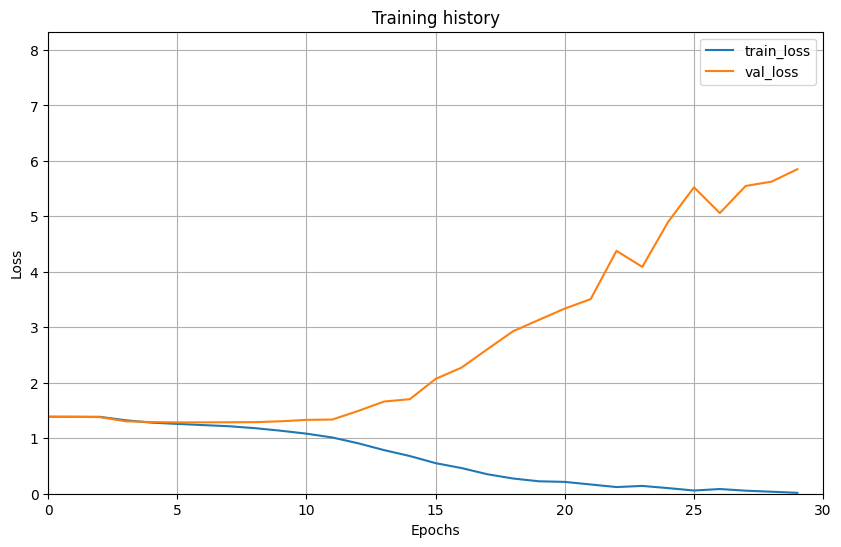

In [90]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

plt.plot(df_history_conv_neu['loss'], label='train_loss')
plt.plot(df_history_conv_neu['val_loss'], label='val_loss')

plt.legend()
plt.xlim(0, len(df_history_conv_neu['loss']))  
plt.ylim(0, max(df_history_conv_neu['loss']) * 6)  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training history')
plt.show()

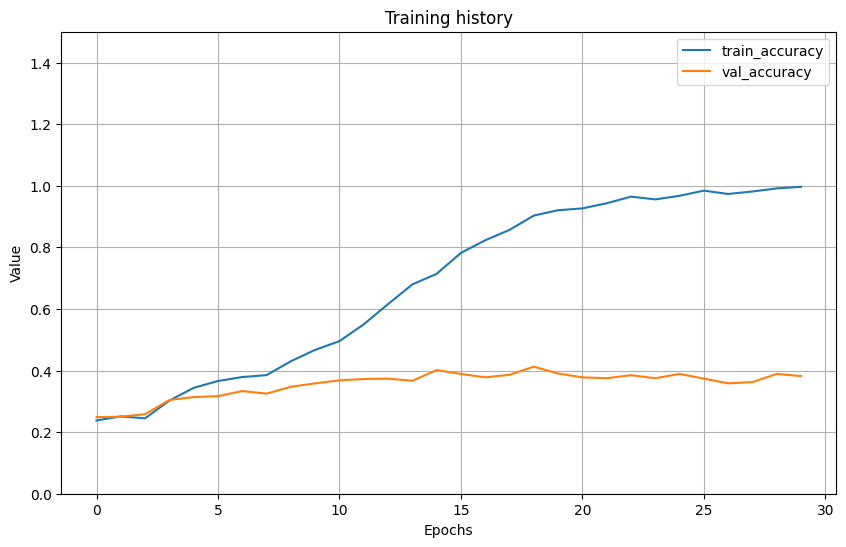

In [82]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
plt.plot(df_history_conv_neu['categorical_accuracy'], label='train_accuracy')
plt.plot(df_history_conv_neu['val_categorical_accuracy'], label='val_accuracy')
# plt.plot(df_history_conv_neu['loss'], label='train_loss')
# plt.plot(df_history_conv_neu['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

In [85]:
mse_test = model_conv_neu.evaluate(X_test, y_test)
print(mse_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - categorical_accuracy: 0.3850 - loss: 5.9926
[5.992580413818359, 0.38499999046325684]


In [93]:
y_true = y_test.argmax(axis=1)
y_pred = model_conv_neu.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
cm

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step


array([[51, 21, 13, 17],
       [23, 35, 28, 15],
       [13, 37, 33, 13],
       [33, 15, 18, 35]])

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


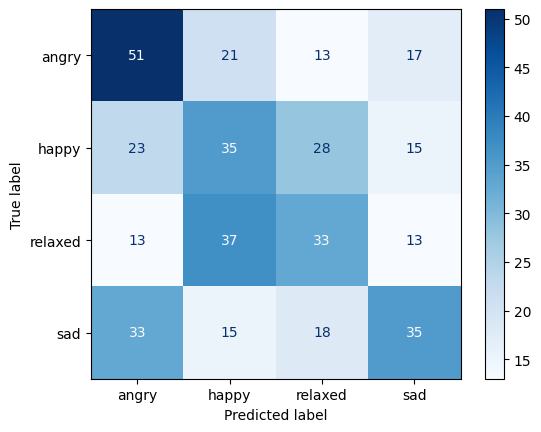

In [94]:
y_pred_probs = model_conv_neu.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

class_names = ["angry", "happy", "relaxed", "sad"]
cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')

# CONCLUSIONES

El modelo ha mejorad con respecto a la red neuronal anterior:

- **Validación más estable**
- **Aprendizaje más coherente**

Aún hay margen de mejora porque:

- El dataset sigue siendo pequeño (239 imágenes)
- Se puede usar **data augmentation** o **transfer learning** para estabilizar y subir la accuracy.


## Redes convolucionales + Redes neuronales + Data Augmentation

In [196]:
train_datagen = ImageDataGenerator(
    rescale=1./1,
    rotation_range=10,      
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    zoom_range=0.1,         
    horizontal_flip=True,   
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=16)
val_generator   = val_datagen.flow(X_val, y_val, batch_size=16)

In [197]:
layers_final = [
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
]

model_conv_neu_final = keras.Sequential(layers_final)

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [198]:
model_conv_neu_final.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390,436 (1.49 MB)

 Trainable params: 390,436 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [199]:
model_conv_neu_final = keras.Sequential(layers_final)
model_conv_neu_final.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

In [200]:
history_conv_neu_final = model_conv_neu_final.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

Epoch 1/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - categorical_accuracy: 0.2694 - loss: 1.3817 - val_categorical_accuracy: 0.3306 - val_loss: 1.3604
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - categorical_accuracy: 0.3208 - loss: 1.3223 - val_categorical_accuracy: 0.3222 - val_loss: 1.3630
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - categorical_accuracy: 0.3406 - loss: 1.2944 - val_categorical_accuracy: 0.3208 - val_loss: 1.3202
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - categorical_accuracy: 0.3562 - loss: 1.2792 - val_categorical_accuracy: 0.3319 - val_loss: 1.2977
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - categorical_accuracy: 0.3500 - loss: 1.2786 - val_categorical_accuracy: 0.3417 - val_loss: 1.2945
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - categorical_accuracy: 0.3469 - loss: 1.2787 - val_categorical_accuracy: 0.3417 - val_loss: 1.2853
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - categorical_accuracy: 0.363

In [202]:
df_history_conv_neu_final = pd.DataFrame(history_conv_neu_final.history)
df_history_conv_neu_final

categorical_accuracy      loss  val_categorical_accuracy  val_loss
0               0.269444  1.381683                  0.330556  1.360352
1               0.320833  1.322319                  0.322222  1.362998
2               0.340625  1.294441                  0.320833  1.320237
3               0.356250  1.279172                  0.331944  1.297709
4               0.350000  1.278594                  0.341667  1.294475
5               0.346875  1.278733                  0.341667  1.285326
6               0.363542  1.278298                  0.325000  1.277676
7               0.371181  1.268134                  0.350000  1.273775
8               0.366319  1.259925                  0.338889  1.280201
9               0.384722  1.247495                  0.337500  1.299991
10              0.392361  1.241536                  0.366667  1.281654
11              0.401736  1.236206                  0.377778  1.287202
12              0.407639  1.222977                  0.377778  1.245704
13              0.423611  1.216533                  0.401389  1.222843
14              0.427083  1.196949                  0.397222  1.224222
15              0.432292  1.192766                  0.390278  1.217512
16              0.445833  1.181923                  0.400000  1.214914
17              0.455208  1.170805                  0.408333  1.214898
18              0.457639  1.165115                  0.426389  1.192537
19              0.470139  1.146636                  0.427778  1.196989
20              0.482639  1.119992                  0.420833  1.224462
21              0.500347  1.113862                  0.462500  1.167921
22              0.507292  1.101331                  0.452778  1.190113
23              0.526389  1.070177                  0.480556  1.136229
24              0.521875  1.062374                  0.455556  1.136706
25              0.540278  1.034835                  0.440278  1.243507
26              0.552778  1.023110                  0.472222  1.089990
27              0.556944  1.012844                  0.515278  1.072733
28              0.562500  1.002496                  0.495833  1.106344
29              0.574653  0.975488                  0.529167  1.054035
30              0.595139  0.946100                  0.494444  1.126629
31              0.602083  0.934978                  0.516667  1.070685
32              0.619792  0.900752                  0.486111  1.135439
33              0.608681  0.909125                  0.501389  1.129422
34              0.612500  0.896917                  0.525000  1.060845
35              0.646181  0.859489                  0.518056  1.072852
36              0.626389  0.860630                  0.530556  1.082200
37              0.641319  0.862683                  0.538889  1.046905
38              0.661458  0.818861                  0.526389  1.107741
39              0.661111  0.802586                  0.538889  1.072369
40              0.678472  0.775658                  0.568056  1.064082
41              0.697569  0.749938                  0.559722  1.052251
42              0.698958  0.738682                  0.530556  1.058793
43              0.706597  0.730253                  0.561111  1.012871
44              0.707292  0.730144                  0.551389  1.075883
45              0.701389  0.723949                  0.523611  1.120596
46              0.710764  0.712869                  0.562500  1.105960
47              0.718750  0.696673                  0.597222  1.044062
48              0.732639  0.652666                  0.547222  1.087801
49              0.733333  0.668413                  0.563889  1.102234

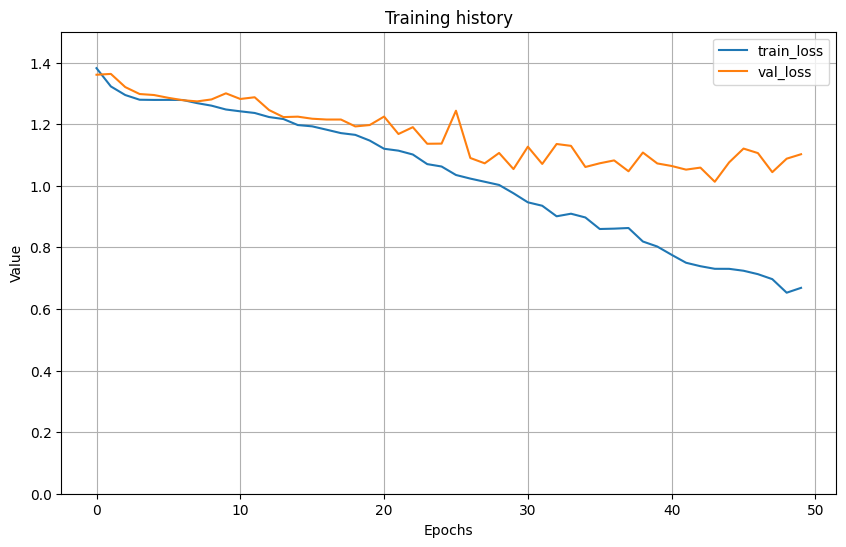

In [203]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
# plt.plot(df_history_conv_neu['categorical_accuracy'], label='train_accuracy')
# plt.plot(df_history_conv_neu['val_categorical_accuracy'], label='val_accuracy')
plt.plot(df_history_conv_neu_final['loss'], label='train_loss')
plt.plot(df_history_conv_neu_final['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

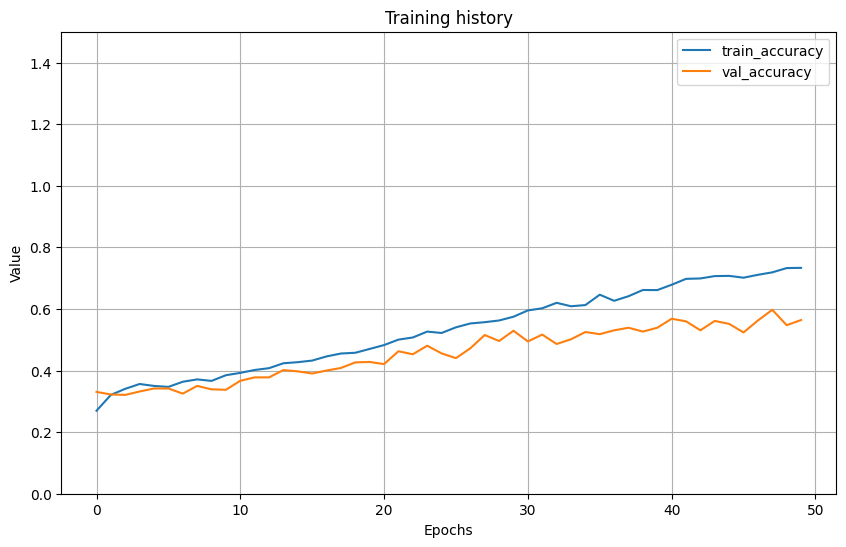

In [204]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)  # rango vertical

# Graficamos las métricas
plt.plot(df_history_conv_neu_final['categorical_accuracy'], label='train_accuracy')
plt.plot(df_history_conv_neu_final['val_categorical_accuracy'], label='val_accuracy')
# plt.plot(df_history_conv_neu['loss'], label='train_loss')
# plt.plot(df_history_conv_neu['val_loss'], label='val_loss')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training history')
plt.show()

In [206]:
mse_test = model_conv_neu_final.evaluate(X_test, y_test)
print(mse_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.5750 - loss: 1.1125
[1.112549901008606, 0.574999988079071]


In [125]:
X_test[:1]

array([[[[0.10588235],
         [0.10980392],
         [0.11372549],
         ...,
         [0.07450981],
         [0.34509805],
         [0.42745098]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.09019608],
         [0.27450982],
         [0.32941177]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.09019608],
         [0.08235294]],

        ...,

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.10588235],
         [0.10196079]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.10588235],
         [0.10196079]],

        [[0.10588235],
         [0.10588235],
         [0.10588235],
         ...,
         [0.10588235],
         [0.10588235],
         [0.10196079]]]], shape=(1, 64, 64, 1), dtype=float32)

In [207]:
predictions = model_conv_neu_final.predict(X_test[:1])
print(predictions.shape)
np.round(predictions,3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
(1, 4)


array([[0.248, 0.124, 0.2  , 0.428]], dtype=float32)

In [208]:
predictions

array([[0.24759856, 0.12444317, 0.20017868, 0.42777964]], dtype=float32)

In [209]:
predictions.argmax()

np.int64(3)

In [210]:
X_test.shape[0]

400

In [137]:
X_test.shape[0]/32

0.75

In [211]:
model_conv_neu_final.predict(X_test).argmax(axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([3, 1, 1, 0, 2, 2, 0, 3, 0, 0, 3, 3, 0, 3, 1, 3, 3, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 0, 1, 3, 2, 3, 0, 2, 3, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 3, 3,
       0, 2, 3, 0, 1, 3, 2, 0, 0, 0, 2, 0, 3, 1, 2, 1, 1, 3, 1, 3, 0, 1,
       0, 3, 3, 1, 3, 2, 0, 0, 1, 1, 1, 3, 0, 1, 3, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 3, 0, 3, 3, 1, 3, 1, 0, 0, 3, 1, 2, 1, 0, 0, 0, 3, 0, 0,
       0, 0, 3, 1, 1, 0, 3, 3, 1, 0, 2, 1, 1, 1, 3, 0, 0, 3, 1, 1, 2, 3,
       1, 2, 2, 3, 2, 3, 3, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 3, 0, 1, 1, 1,
       0, 0, 3, 1, 0, 1, 3, 1, 3, 0, 1, 1, 2, 3, 0, 3, 1, 0, 0, 0, 0, 1,
       3, 3, 2, 1, 3, 0, 0, 3, 1, 1, 2, 0, 1, 3, 1, 3, 2, 0, 3, 3, 0, 0,
       1, 3, 0, 3, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 3, 1, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 1, 0, 3, 2, 3, 0, 0, 1, 0, 1, 1, 1, 3, 2, 1, 2,
       1, 3, 1, 0, 3, 0, 1, 2, 3, 3, 3, 1, 3, 1, 1, 1, 0, 1, 3, 2, 3, 2,
       1, 1, 0, 0, 1, 3, 3, 0, 3, 3, 3, 1, 3, 1, 3,

C:\Users\Administrador\AppData\Local\Temp\ipykernel_17592\1990880056.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[1].reshape(64,64,3), cmap=plt.cm.get_cmap('Greys'));


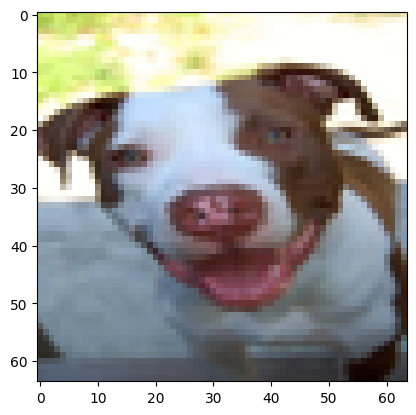

In [92]:
plt.imshow(X_test[1].reshape(64,64,3), cmap=plt.cm.get_cmap('Greys'));

In [212]:
y_true = y_test.argmax(axis=1)
y_pred = model_conv_neu_final.predict(X_test).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
cm

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[66, 22,  7,  7],
       [15, 70,  8,  8],
       [16, 29, 33, 18],
       [24,  4, 12, 61]])

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


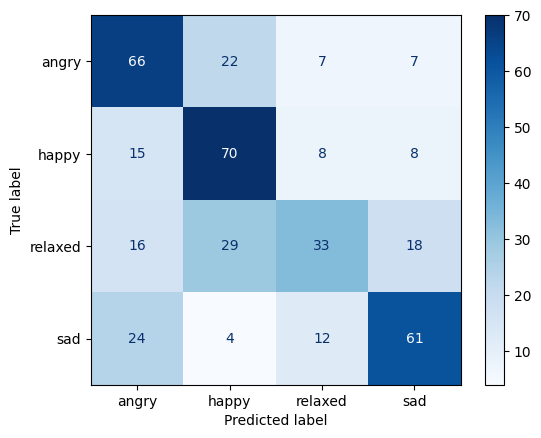

In [213]:
y_pred_probs = model_conv_neu_final.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

class_names = ["angry", "happy", "relaxed", "sad"]
cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')

# Exportación del modelo

In [214]:
model_conv_neu_final.save("modelo_emociones.h5")

In [215]:
model = keras.models.load_model("modelo_emociones.h5")